## Homework Linear Regression

- The dataset you are working is Boston Housing Price

- The Boston_Housing_Prices dataset is a famous dataset usually used for learning or benchmarking regression techniques. This dataset contains 14 variables, one of which (MEDV, median value of home) we'll use as the target. 

- For this assignment, your task is to:

1- Read in the dataset using sklearn's load_boston() function (found in sklearn.datasets) 

2- Perform some basic exploratory data analysis to get a feel for the data. Graph some stuff! 

3- Create a correlation heatmap to check to see how highly correlated our predictor variables (features) are (Remember, if our predictors are highly correlated, this is bad.)

4- Train the model based on the train set. Use 75 peercent of the data for train part. Use 25 percent of the data for test part.

Hint: from sklearn.model_selection import train_test_split

Hint: X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


5 -Make predictions on your test set (X_test) and see how well it compares to the actual targets (y_test) from the test set.

6- Compute, Mean-Square-Error (MSE) and R Squared score of your Model

Hint: from sklearn.metrics import r2_score

Hint: from sklearn.metrics import mean_squared_error

## Apply data normalization (Scaling) to improve the prediction result

- Use StandardScaler and then train your Linear Regression Model. Comapre the R Square score with previous one you got

- Use MinMaxScaler and then train your Linear Regression Model. Comapre the R Square score with previous one you got

- Watch this video: https://www.youtube.com/watch?v=YKP31T5LIXQ

In [6]:
# import the tools we'll need
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

### First look at the data:

In [20]:
boston = load_boston()

df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['PRICE'] = boston.target

print(df.shape)
df.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Histogram of prices:

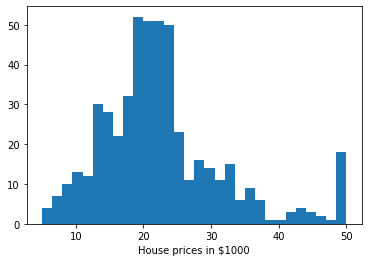

In [21]:
plt.hist(boston.target, bins=30)
plt.xlabel("House prices in $1000") 
plt.show()

### Correlation Matrix:
The correlation matrix tells us how correlated features are. 
1 means very correlated. 
0 being least correlated.
-1 being very negatively correlated.
The 1s that appear below are there because those are features being compared with themselves.

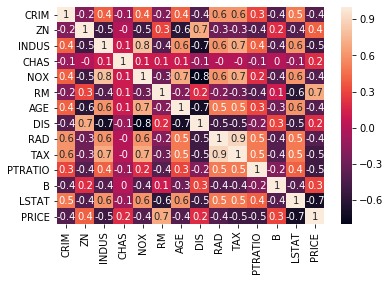

In [22]:
correlation_matrix = df.corr().round(1)
sns.heatmap(data=correlation_matrix, annot=True)

### Correaltion between everything and the price.

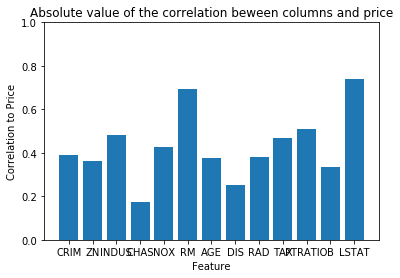

In [62]:
plt.bar(df.columns[:-1], abs(df.corr()['PRICE'])[:-1])
plt.title('Absolute value of the correlation beween columns and price')
plt.ylim(0,1)
plt.xlabel('Feature')
plt.ylabel('Correlation to Price')
plt.show()